In [ ]:
import os
import pandas as pd
import numpy as np
from datetime import date, timedelta
import plotly.express as px
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings
import itertools

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Drive02/forecast.csv')

In [ ]:
data.describe()

,Revenue
count,88.000000
mean,3302.034091
std,1477.855719
min,1078.000000
25%,1864.250000
50%,3162.000000
75%,4457.500000
max,6410.000000


In [ ]:
data.head()

,Time Period,Revenue
0,2000Q1,1517
1,2000Q2,1248
2,2000Q3,1677
3,2000Q4,1393
4,2001Q1,1558


In [ ]:
data.max()

Time Period    2021Q4
Revenue          6410
dtype: object

In [ ]:
data.dtypes

Time Period    object
Revenue         int64
dtype: object

In [ ]:
data.head()

,Time Period,Revenue
0,2000Q1,1517
1,2000Q2,1248
2,2000Q3,1677
3,2000Q4,1393
4,2001Q1,1558


In [ ]:
data.tail()

,Time Period,Revenue
83,2020Q4,5142
84,2021Q1,5268
85,2021Q2,5077
86,2021Q3,5752
87,2021Q4,5137


<Axes: >

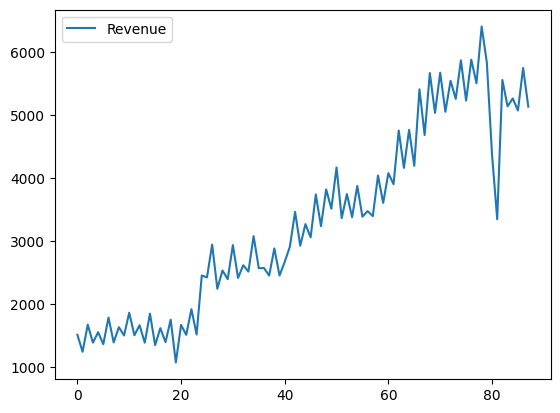

In [ ]:
data.plot()

In [ ]:
fig = px.line(data, x = 'Time Period', y = 'Revenue')
fig.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

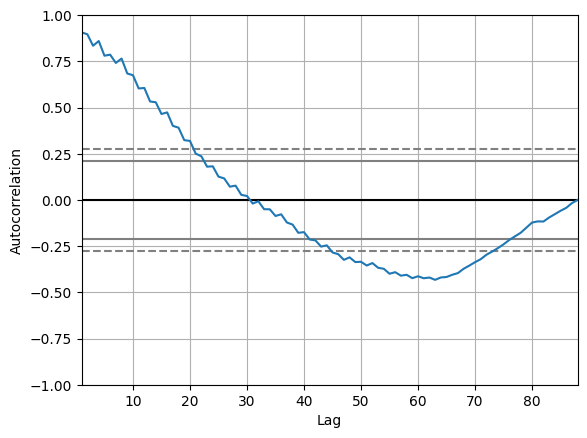

In [ ]:
pd.plotting.autocorrelation_plot(data["Revenue"])

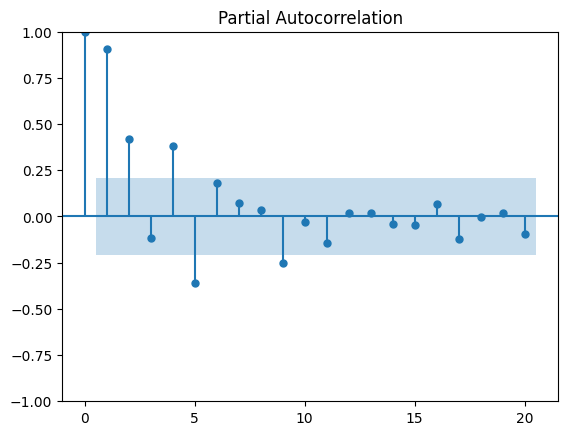

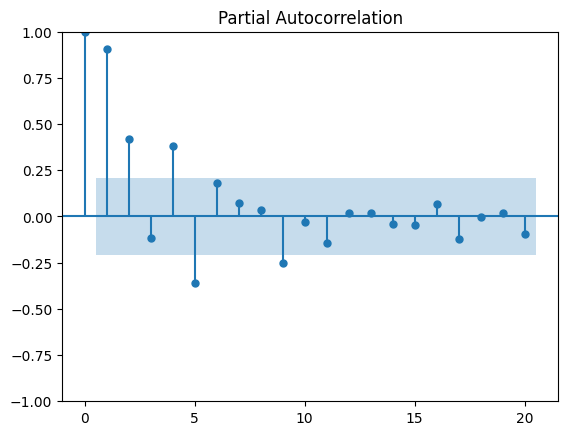

In [ ]:
plot_pacf(data["Revenue"], lags = 20)

In [ ]:
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data['Revenue'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1675.23752922141
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1378.101832499653
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:2578.0345094588242
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1232.3967542676965
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1045.0911681054918
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:1600.0512157143887
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:1063.567142436619
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:827.1149482155679
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:625.8821549800714
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1218.288658334548
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1185.8896865517754
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:990.2279255346181
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1058.675334723413
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1021.914400358427
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:3485.7769134510236
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:833.321953455674
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:802.7545842393403
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:617.8480236887966
ARIMA(

In [ ]:
model=sm.tsa.statespace.SARIMAX(data['Revenue'],
                                order=(0, 2, 2),
                                seasonal_order=(0, 2, 2, 12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                            Revenue   No. Observations:                   88
Model:             SARIMAX(0, 2, 2)x(0, 2, 2, 12)   Log Likelihood                -472.248
Date:                            Mon, 21 Aug 2023   AIC                            954.496
Time:                                    20:41:01   BIC                            965.132
Sample:                                         0   HQIC                           958.672
                                             - 88                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.1533      0.699     -1.650      0.099      -2.523       0.216
ma.L2          0.1588      0.092   

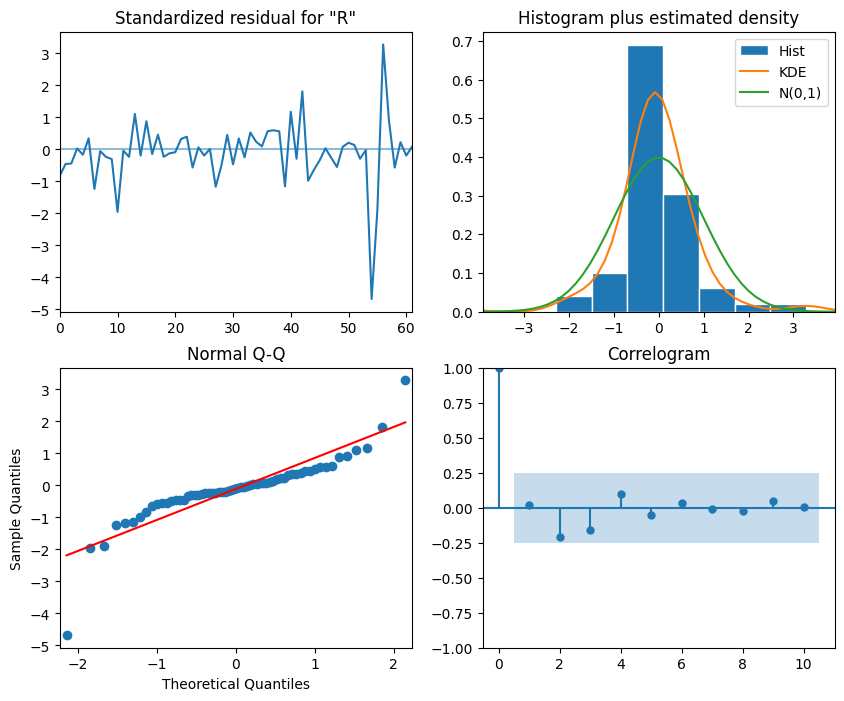

In [ ]:
model.plot_diagnostics(figsize=(10, 8))
plt.show()